In [1]:


from chessplainer._deprecated.wrapper import StockfishWrapper, ChessShap
import chess

False


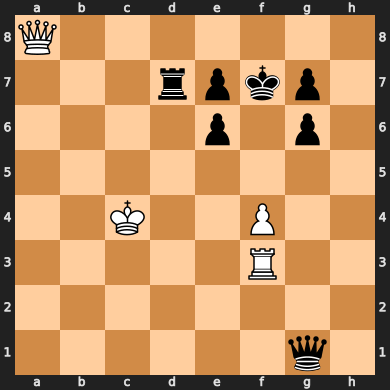

In [115]:
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1")  # black to move
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 1")  # white to move
board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")
# board = chess.Board("5k2/4ppp1/8/8/2K5/5R2/8/8 w - - 0 1")
board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1")

board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
board = chess.Board("Q7/4pkp1/3rp1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")

board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5P2/5R2/6q1 w - - 0 1")

board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1")




# board = chess.Board("Q7/4pkp1/4p1p1/8/2K5/5R2/8/8 w - - 0 1")
# board = chess.Board("2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1") # reddit

# board = chess.Board("5K2/8/8/P3pkp1/p6p/4P2P/1nN5/8 w - - 0 1")
# board = chess.Board("8/6q1/8/8/8/5k2/8/4K3 b - - 0 1")  # black to mate
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")  # white to mate
# board = chess.Board("3q1k2/8/8/8/8/8/2R5/2K5 w - - 0 1")
# board = chess.Board("3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1")
# board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1")
# board = chess.Board()
print(board.turn)
board

In [116]:
engine = StockfishWrapper(predict_analyze_time=0.01)

In [117]:
# engine.engine.analyse(board, limit=chess.engine.Limit(0.1))

In [118]:
# board.turn = chess.BLACK      #
# board.is_mate()

In [119]:
# chess.engine.PovScore(100, not board.turn).black()

In [120]:
engine.fit([board])

,path,None
,fit_analyze_time,1
,predict_analyze_time,0.01


In [121]:
engine.base_score_

0

In [122]:
# engine.base_eval_.relative.cp

In [123]:
import shap

In [124]:
chesshap = ChessShap(board, engine, exp=shap.KernelExplainer)
print(chesshap.engine.base_score_)

0


In [125]:
chesshap.shap_values(100)
# chesshap.shap_values(10)

array([[-78.96816925,  63.90858192, -21.7854446 , -22.81873748,
         -6.1932189 , -69.47966515, -18.65421783, -17.03618585,
         71.02705716]])

False
True
False
-100.0


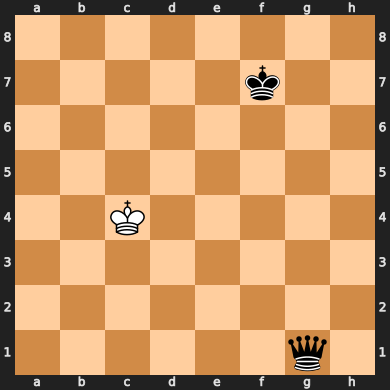

In [126]:
i = 0
print(chesshap.engine.base_board_.turn)
print(chesshap.engine.predict_boards_[i].is_valid())
print(chesshap.engine.predict_boards_[i].is_checkmate())
print(chesshap.engine.predict_evals_[i])
# print(chesshap.engine.multipliers_[i])
chesshap.engine.predict_boards_[i]


In [127]:
chesshap.shap_values_.sum() + chesshap.explainer_.expected_value - chesshap.engine.base_score_

np.float64(-100.00000000000003)

In [128]:
chesshap.explainer_.expected_value

0.0

In [129]:
chesshap.engine.base_score_

0

In [130]:
chesshap.shap_values_.sum()

np.float64(-100.00000000000003)

In [131]:
chesshap.shap_values_

array([[-78.96816925,  63.90858192, -21.7854446 , -22.81873748,
         -6.1932189 , -69.47966515, -18.65421783, -17.03618585,
         71.02705716]])

In [132]:
chesshap.explainer_.expected_value

0.0

In [133]:
chesshap.shap_values_

array([[-78.96816925,  63.90858192, -21.7854446 , -22.81873748,
         -6.1932189 , -69.47966515, -18.65421783, -17.03618585,
         71.02705716]])

In [134]:
chesshap.pieces

{6: Piece.from_symbol('q'),
 21: Piece.from_symbol('R'),
 29: Piece.from_symbol('P'),
 44: Piece.from_symbol('p'),
 46: Piece.from_symbol('p'),
 51: Piece.from_symbol('r'),
 52: Piece.from_symbol('p'),
 54: Piece.from_symbol('p'),
 56: Piece.from_symbol('Q')}

In [135]:
chesshap.explainer_.expected_value, chesshap.engine.base_score_

(0.0, 0)

In [136]:
# chesshap.plot()

In [137]:
# chesshap.plot(absolute=False)

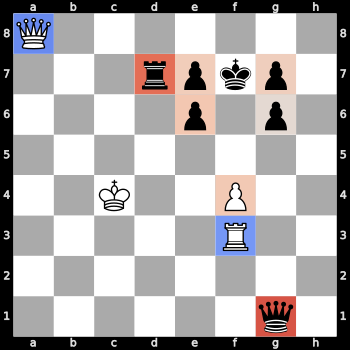

In [138]:
chesshap.plot2(absolute=True, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

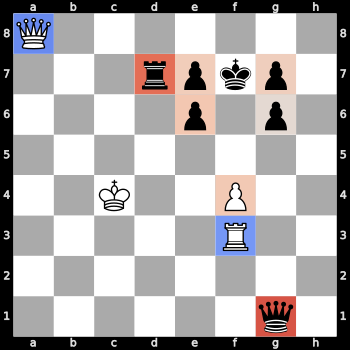

In [139]:
chesshap.plot2(absolute=False, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

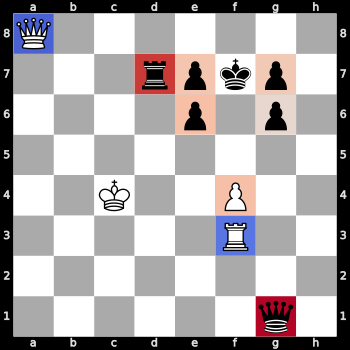

In [140]:
chesshap.plot2(local_range=True, absolute=False, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

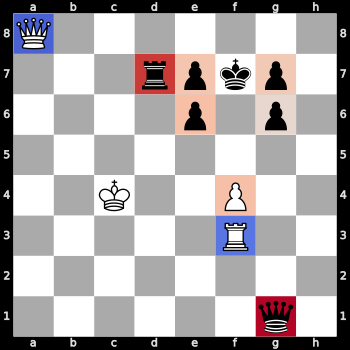

In [141]:
chesshap.plot2(local_range=True, absolute=True, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

In [142]:
flipped = chesshap.engine.predict_boards_[i].copy()
flipped.turn = not flipped.turn

In [143]:
flipped.is_valid()

True

In [144]:
score = engine.engine.analyse(flipped, limit=chess.engine.Limit(0.1))["score"]

In [145]:
score.white().score

<bound method Mate.score of Mate(-10)>

In [146]:
type(score.pov(1))

chess.engine.Mate

In [147]:
chess.engine.MateGivenType()

MateGiven

In [148]:
score.white() == chess.engine.MateGivenType()

False

In [149]:
dir(score)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'black',
 'is_mate',
 'pov',
 'relative',
 'turn',
 'wdl',
 'white']

In [150]:
flipped.is_checkmate()

False

In [151]:
chesshap.engine.predict_boards_[i].mirror().status()

<Status.VALID: 0>